In [1]:
import sys, os
sys.path.append('/work/mflora/ROAD_SURFACE')
sys.path.insert(0, '/home/monte.flora/python_packages/scikit-explain')

from skexplain import ExplainToolkit
from skexplain.common.importance_utils import to_skexplain_importance

import pickle 
from joblib import load 

#from display_names import to_readable_names, to_color 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from probsr_config import TARGET_COLUMN, PREDICTOR_COLUMNS, FIGURE_MAPPINGS

In [2]:
BASE_PATH = '/work/mflora/explainability_work/'
DATA_BASE_PATH = os.path.join(BASE_PATH, 'datasets')

In [3]:
target= 'road_surface'
opt = 'original' #'L1_based_feature_selection_with_manual'

In [4]:
#model_name = f'../models/LogisticRegression_first_hour_{target}_under_standard_{opt}.pkl'
#data = load(model_name)
#model = data['model']
#feature_names = data['features']

with open(os.path.join(DATA_BASE_PATH, f'sage_results_{opt}_{target}.nc'), 'rb') as f:
    sage_results = pickle.load(f)
        
sage_rank = to_skexplain_importance(sage_results,
                                 estimator_name='RandomForest', 
                                 feature_names=PREDICTOR_COLUMNS, 
                                 method = 'sage')

In [5]:
#display_feature_names = {f : to_readable_names(f) for f in feature_names}
#feature_colors = {f : to_color(f) for f in feature_names}

(<Figure size 900x750 with 3 Axes>, <AxesSubplot:>)

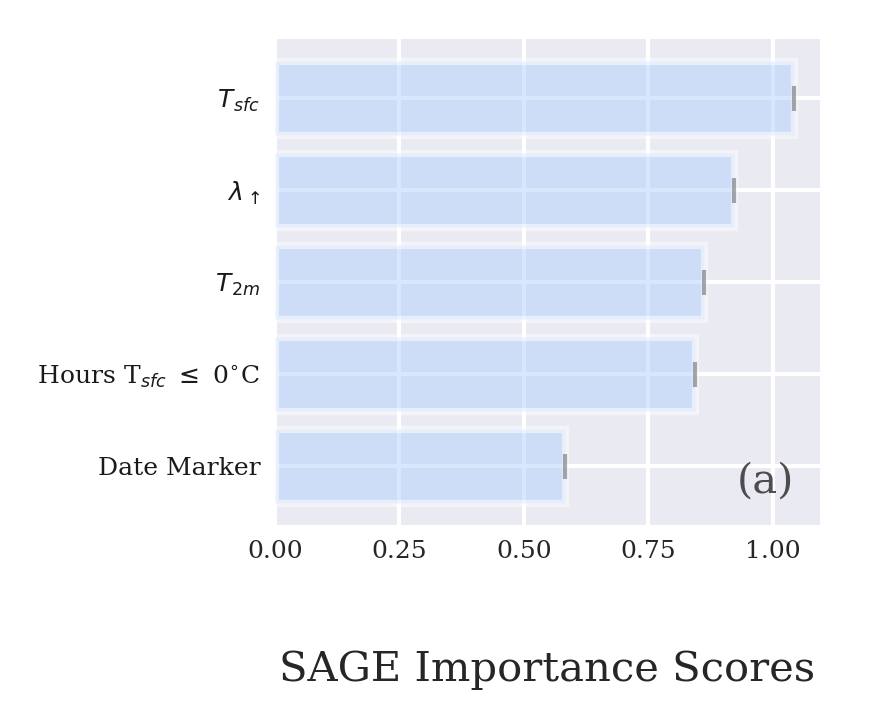

In [6]:
panels = [('sage', 'RandomForest')]
explainer = ExplainToolkit(estimator_output='probability')
explainer.plot_importance(data=sage_rank, 
                         panels = panels, 
                         display_feature_names=FIGURE_MAPPINGS,
                          num_vars_to_plot=5
                         ) 